
<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1995 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html).

> **Acknowledgement:** This notebook was constructed using JupyterHub service from [syzygy.ca](http://syzygy.ca) with assistance from [Ian Allison](https://github.com/ianabc) and India Heisz. -- [James Colliander](http://colliand.com)

In [3]:
## Install some python libraries
import numpy as np
import pandas as pd
import sys

## Build a data frame with NSERC Awards Data by iteratively reading CSV files hosted on AWS S3.
## It would improve reproducibility if we imported from a definitive NSERC Awards Data.
df = pd.DataFrame()

startYear = 1995
endYear   = 2017  # The last year is not included, so 2017 means we include the 2016 collection but not 2017.

for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, 
                               compression='gzip', 
                               usecols = [1, 2, 3, 4, 5, 7, 9, 11, 12, 13, 17, 28], 
                               encoding='latin-1'
                              )
                  )  
    print(year)
 
## Rename columns for better readability.
df.columns = ['Name', 'Department', 'OrganizationID',
                 'Institution', 'ProvinceEN', 'CountryEN',
                 'FiscalYear', 'AwardAmount', 'ProgramID',
                 'ProgramNameEN', 'Committee', 'ResearchSubjectEN']

## Strip out any leading or trailing whitespace in the ProgramID column
df['ProgramID'] = df['ProgramID'].str.strip();

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [4]:
## via India Heisz
## Define some methods
import matplotlib.ticker as mtick
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.tools as tls
import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def nsercPlot (data):
    fig, axes = plt.subplots()

    xAxis = 'FiscalYear'
    yAxis = 'AwardAmount'
    
    y = data.groupby(xAxis).sum()[yAxis]
    x = y.index
    
    plt.xlabel(xAxis, fontsize=14)
    plt.ylabel(yAxis, fontsize=14)
    plt.title(title)
      
    plt.plot(x,y)
    
    init_notebook_mode(connected=True)
    
    axes.scatter(x,y,s=plotPointSizes,alpha=opacity)
    canvas = FigureCanvas(fig)
    plotly_fig = tls.mpl_to_plotly(fig)
    py.iplot(plotly_fig)
    
    return;

def viewAvailableSearch(column, searchString):
    available = df.drop_duplicates(subset = column)
    available = available[available[column].str.contains(searchString, na=False)]
    sorted = available.sort_values(by=[column], ascending=[True])
    print(sorted.to_string(columns= [column], index=False))
    return;

def overview(column, data):
    mean = data[columnYouWantInformationOn].mean()
    print('The mean of ' + str(columnYouWantInformationOn) + ' is ' + str(mean))

    median = data[columnYouWantInformationOn].median()
    print('The median of ' + str(columnYouWantInformationOn) + ' is ' + str(median))

    standardDeviation = data[columnYouWantInformationOn].std()
    print('The standard deviation of ' + str(columnYouWantInformationOn) + ' is ' + str(standardDeviation))

    awardCount = data.AwardAmount.count()
    print('The total number of awards for your selection is ' + str(awardCount))
    return;

## First Look at the Data

An exploration of the giant table.

In [5]:
df
## Display the dataframe on the screen as a table. 

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
0,"Aarssen, Lonnie",Biology,29,Queen's University,Ontario,CANADA,1995,41400,RGPIN,Discovery Grants Program - Individual,18,Terrestrial ecology
1,"Abbott, Harvey",Mathematical Sciences,9,University of Alberta,Alberta,CANADA,1995,14000,RGPIN,Discovery Grants Program - Individual,16,Combinatorics
2,"Abbott, Sean",Biological Sciences,9,University of Alberta,Alberta,CANADA,1995,5755,PGS,Postgraduate Scholarships,147,"Taxonomy, systematics and phylogenetics"
3,"Abcarius, John",Electrical Engineering,61,McGill University,Québec,CANADA,1995,10380,PGS,Postgraduate Scholarships,146,Integrated circuits
4,"Abcarius, Nicole",Head Office,7341,GE Glegg Water Technologies Inc.,Ontario,CANADA,1995,3600,URI,Industrial Undergraduate Student Research Awards,146,Operations research and management science
5,"Abdalla, Hany",Civil Engineering,70,Concordia University,Québec,CANADA,1995,20985,PDF,Postdoctoral Fellowships,146,Structural engineering
6,"AbdelAziz, Alaa",Chemistry,21,University of Winnipeg,Manitoba,CANADA,1995,32264,RGPIN,Discovery Grants Program - Individual,24,Metal and organometallic chemistry
7,"AbdElHalim, Omar",Civil and Environmental Engineering,23,Carleton University,Ontario,CANADA,1995,20000,RGPIN,Discovery Grants Program - Individual,6,Structural materials
8,"AbdelRahman, AbdelFattah",Geology,70,Concordia University,Québec,CANADA,1995,15000,RGPIN,Discovery Grants Program - Individual,8,"Petrology, igneous and metamorphic geology"
9,"Abdelrahman, Tarek",Electrical and Computer Eng.,31,University of Toronto,Ontario,CANADA,1995,9500,RGPIN,Discovery Grants Program - Individual,7,Software and development


In [6]:
## Number of rows representing all award reports from NSERC during 1995-2016
len(df)

457896

In [7]:
df.columns

Index(['Name', 'Department', 'OrganizationID', 'Institution', 'ProvinceEN',
       'CountryEN', 'FiscalYear', 'AwardAmount', 'ProgramID', 'ProgramNameEN',
       'Committee', 'ResearchSubjectEN'],
      dtype='object')

Money flowed out of NSERC? We have a data set that reports NSERC disbursements with data to answer:
> When? Who received it? Which university? Province? How much? Which NSERC program?

## Values in Columns

In [8]:
df['Department'].unique()

array(['Biology', 'Mathematical Sciences', 'Biological Sciences', ...,
       'Physiology and Pathophysiology - Physiology and Pathophysiology',
       'NanoEngineering',
       'Science and Technology, School of - Science and Technology, School of'], dtype=object)

In [9]:
## Number of unique departments
len(df['Department'].unique())

5716

In [10]:
df['ProvinceEN'].unique()

array(['Ontario', 'Alberta', 'Québec', 'Manitoba', 'Minnesota',
       'Nova Scotia', 'Newfoundland and Labrador', 'New Brunswick',
       'Saskatchewan', 'British Columbia', nan, 'Rhode Island',
       'North Carolina', 'California', 'Michigan', 'New York', 'Indiana',
       'New Mexico', 'Massachusetts', 'Vermont', 'Prince Edward Island',
       'Colorado', 'Washington', 'Arizona', 'Utah', 'New Jersey',
       'Maryland', 'Illinois', 'Tennessee', 'Texas', 'Oregon',
       'Connecticut', 'Delaware', 'South Carolina', 'Missouri', 'Virginia',
       'Pennsylvania', 'Iowa', 'Florida', 'Wisconsin', 'Georgia',
       'Alabama', 'District of Columbia', 'Ohio', 'Kansas',
       'New Hampshire', 'Kentucky', 'Oklahoma', 'Hawaii', 'Arkansas',
       'Yukon', 'Alaska', 'Montana', 'Louisiana', 'Maine', 'Nunavut',
       'Nevada', 'Idaho', 'Northwest Territories', 'Nebraska',
       'Mississippi', 'Yukon Territory'], dtype=object)

In [11]:
# How many unique ProgramID values?
len(df['ProgramID'].unique())

204

In [12]:
## Mismatch in program labels?
## TODO: Match ProgramNameEN to ProgramID; Find outliers
len(df['ProgramNameEN'].unique())

207

In [13]:
table =  pd.pivot_table(assessments,index=['Course'], aggfunc = max, 
               values = ['Enrolments used',
                         'Students','Team members', 
                         'Owner', 'Uploaded pages', 
                         'Hours grading'
                        ]).sort_values(by=['Enrolments used'], ascending=[False])

NameError: name 'assessments' is not defined

In [14]:
pd.pivot_table(df, index=['ProgramNameEN','FiscalYear'], aggfunc=sum,
               values = ['AwardAmount']
              ).sort_values(by=['AwardAmount'], ascending=False)

AwardAmount
ProgramNameEN                                      FiscalYear             
Discovery Grants Program - Individual              2016          328120835
                                                   2014          318531751
                                                   2015          318145584
                                                   2013          315708147
                                                   2012          314440589
                                                   2011          310896274
                                                   2009          309730991
                                                   2010          307161877
                                                   2008          304466356
                                                   2007          302156326
                                                   2006          299149016
                                                   2005          290622553
                                                   2004          266599163
                                                   2003          263856474
                                                   2002          250797723
                                                   2000          236741847
                                                   2001          231280130
                                                   1999          220248666
                                                   1998          207955469
                                                   1997          187432848
                                                   1996          184133630
                                                   1995          181612886
Canada Research Chairs                             2008          118014545
                                                   2009          117630000
                                                   2010          117343069
                                                   2011          117176009
                                                   2007          115887247
                                                   2012          115431694
                                                   2013          113820345
                                                   2014          112978091
...                                                                    ...
Michael Smith Award for Science Promotion - Ind... 2001              10000
Industrial Research Fellowships                    2014              10000
Michael Smith Award for Science Promotion - Ind... 2003              10000
Doctoral Prizes                                    2015              10000
Undergraduate Student Research Awards Program -... 2014               9000
Regional Office Discretionary Funds - Prairie      2010               9000
Aboriginal Ambassadors in the Natural Sciences ... 2011               8905
                                                   2015               8674
Postgraduate Scholarships - Master's               2015               8650
Banting Postdoctoral Fellowships                   2014               8415
JSPS Researcher Exchange Program               ... 2009               8000
University Research Fellowships (H)                1996               7625
1967 Science and Engineering Scholarships          2001               7127
Canada International Fellowships (H)               1997               6797
Students Promoting Awareness of Research Knowledge 2005               5000
Michael Smith Award for Science Promotion - Ind... 2005               5000
                                                   2006               5000
                                                   2007               5000
                                                   2008               5000
Undergraduate Student Research Awards Program -... 2015               4500
Aboriginal Ambassadors in the Natural Sciences ... 2010               4469
Postgraduate 

In [15]:
programYear = pd.pivot_table(df, index=['ProgramNameEN','FiscalYear'], aggfunc=sum,
               values = ['AwardAmount']
              ).sort_values(by=['AwardAmount'], ascending=False)

In [25]:
## Export this table as a CSV file.
programYear.to_csv('program-year.csv')

## Big Winners

In [16]:
## Historical Program recipents of most NSERC funds: 1995 -- 2016
df.groupby(['ProgramNameEN']).sum()['AwardAmount'].sort_values(ascending=False).head(n=50)

ProgramNameEN
Discovery Grants Program - Individual                                                                   5949789135
Canada Research Chairs                                                                                  1590512911
Collaborative Research and Development Grants                                                            948122955
Strategic Projects - Group                                                                               908959760
Networks of Centres of Excellence                                                                        762559105
Research Tools and Instruments - Category 1 (<$150,000)                                                  565583275
Postgraduate Scholarships                                                                                435601321
Industrial Research Chairs                                                                               398835692
Research Networks                                                 

In [17]:
## Historical PI recipents of most NSERC funds: 1995 -- 2016
df.groupby(['Name']).sum()['AwardAmount'].sort_values(ascending=False).head(n=50)

Name
Hormes, Josef           99836800
Gupta, Arvind           97587570
McWalter, Ian           75503588
Fortier, Louis          72542772
Frise, Peter            63874923
Barge, Brian            50400000
Thomlinson, William     46610800
Fedosejevs, Robert      40720798
McDonald, Arthur        36781300
Orr, Robert             32043881
Smith, Donald           31227906
Mufti, Aftab            28761712
Wallace, Douglas        28433833
Servos, Mark            28130452
Rogers, Harry           27590000
Salama, Andre           26296562
Burton, Howard          25000000
Yada, Rickey            24982617
Clowes, Ronald          24072844
Pelton, Robert          23985763
Svensson, Carl          22782441
Lamb, Robert            21349800
Chrisman, Nicholas      21286250
Larter, Stephen         20024564
Bourbonnais, Normand    17753965
Eyton, Anthony          17575000
Booth, Kellogg          16879011
McPherson, Robert       16858697
Plant, David            16346618
Emadi, Ali              16107231
Withe

## Discovery Grants

In [29]:

title = 'Total Expenditures vs. Time'
plotPointSizes = 7 
opacity = 1

nsercPlot(df)

In [30]:

title = 'Not containing "iscovery" vs. Time'
plotPointSizes = 7 
opacity = 1

nsercPlot(df.loc[~(df['ProgramNameEN'].str.contains('iscovery'))])

In [31]:

title = 'Containing "iscovery" vs. Time'
plotPointSizes = 7 
opacity = 1

nsercPlot(df.loc[(df['ProgramNameEN'].str.contains('iscovery'))])

## Discover Grants across Evaluation Groups

![](https://wwejubwfy.s3.amazonaws.com/NSERC_-_Selection_Committees_and_Evaluation_Groups_2018-04-12_14-37-32.png)

In [33]:
committee=1509

title = 'Committee vs. Time'
plotPointSizes = 7 
opacity = 1

nsercPlot(df.loc[(df['Committee'] == committee)])

In [34]:
EvaluationGroups = df.loc[(df['Committee']==1501) 
                                   | (df['Committee']==1502)
                                   | (df['Committee']==1503)
                                   | (df['Committee']==1504) 
                                   | (df['Committee']==1505)
                                   | (df['Committee']==1506)
                                   | (df['Committee']==1507)
                                   | (df['Committee']==1508)
                                   | (df['Committee']==1509)
                                   | (df['Committee']==1510)
                                   | (df['Committee']==1511)
                                   | (df['Committee']==1512)]

In [47]:
## 2009 is an outlier so drop it. 2010 is also a bit weird.
EG = EvaluationGroups.loc[~(EvaluationGroups['FiscalYear']==2009)]

In [37]:
EG['FiscalYear'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016])

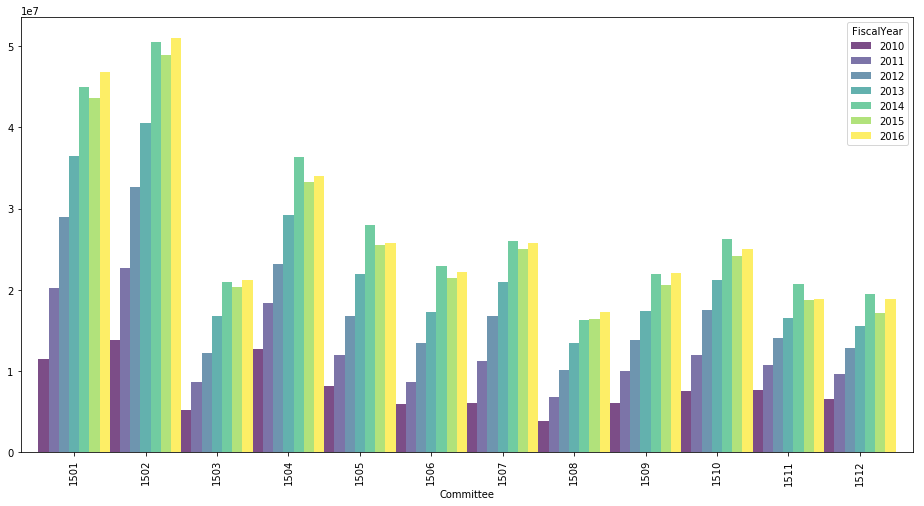

In [38]:
## Total investment dollars vs Fiscal Year separated by Evaluation Group Committee
(EG.groupby(['Committee','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

Discipline Dynamics? The number and age of PIs in served by each committee and each fiscal year changes.

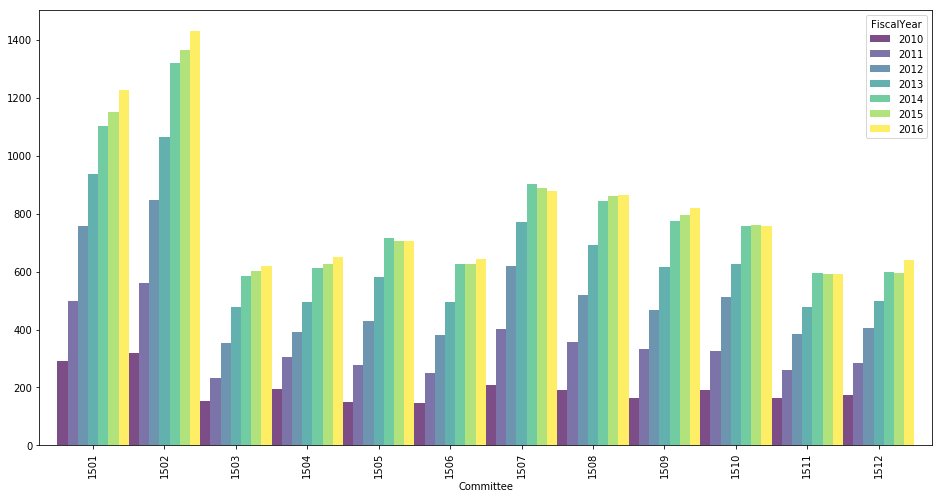

In [45]:
## Number of Awards vs Fiscal Year separated by Evaluation Group Committee
(EG.groupby(['Committee','FiscalYear']).count()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

Calculuate an average? Divide the total dollars spent on a committee during a fiscal year 
by the number of awards given in that committee during that fiscal year.

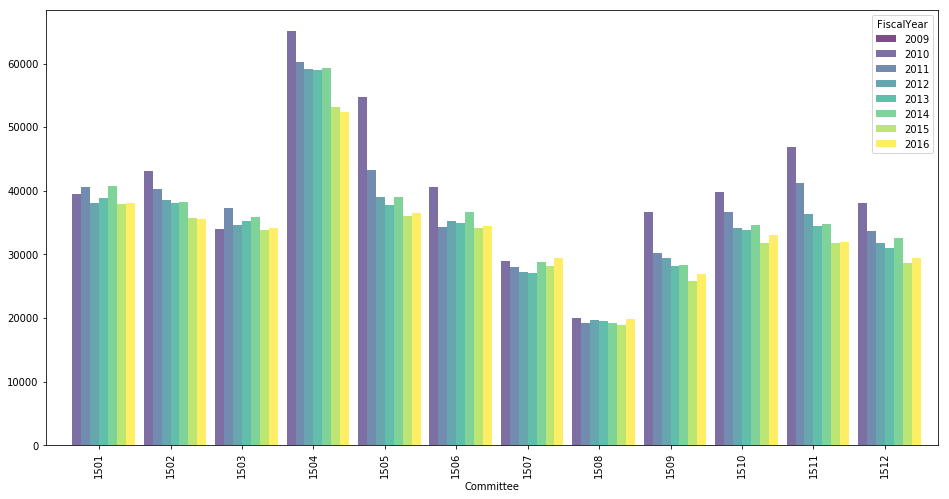

In [46]:
## Total Dollars invested divided by number of awards vs. Fiscal Year separated by Evaluation Group Committee
((EG.groupby(['Committee','FiscalYear']).sum()
 ['AwardAmount'])/(EvaluationGroups.groupby(['Committee','FiscalYear']).count()
 ['AwardAmount'])).unstack().plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

There is a general trend for the average award size to be flat or shrinking. Inflation adjustment would 
shrink more recent years. Note the frequent drop for 2015 and 2016 across most Committees.

Section 1508 is visibly underfunded.

Chemistry (1504) dropped significantly in 2015 and 2016.

## Explore Funding of Major Programs by Institution

## Canada Research Chairs

In [24]:
crc = df.loc[df['ProgramNameEN']=='Canada Research Chairs']

In [52]:
crc

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
233,"Allison, Gwen","Dept. of Agricultual, Food & Nutritional",9,University of Alberta,Alberta,CANADA,2000,50000,CRC,Canada Research Chairs,9998,Microbiology
509,"Aubin, CarlÉric",Génie mécanique,64,École Polytechnique de Montréal,Québec,CANADA,2000,25000,CRC,Canada Research Chairs,9998,Biomedical engineering
979,"Beaulieu, Norman",Electrical & Computer Engineering,9,University of Alberta,Alberta,CANADA,2000,100000,CRC,Canada Research Chairs,9998,Electrical and electronic engineering
1114,"Benbasat, Izak",Faculty of Commerce & Business Admin.,2,University of British Columbia,British Columbia,CANADA,2000,100000,CRC,Canada Research Chairs,9998,Not available
1129,"Bengio, Yoshua",informatique et recherche opérationnelle,63,Université de Montréal,Québec,CANADA,2000,50000,CRC,Canada Research Chairs,9998,"Artificial intelligence (computer vision, use2..."
1496,"Bohme, Diethard",Chemistry/Pure & Applied Science,38,York University,Ontario,CANADA,2000,100000,CRC,Canada Research Chairs,9998,Physical chemistry
1710,"Bousquet, Jean",NaN,51,Université Laval,Québec,CANADA,2000,100000,CRC,Canada Research Chairs,9998,Genetics
1793,"Brassard, Gilles",Informatique et recherche opérationnelle,63,Université de Montréal,Québec,CANADA,2000,100000,CRC,Canada Research Chairs,9998,Information technology
1950,"Brown, Ian","Division of Life Sciences, Scarborogh Ca",31,University of Toronto,Ontario,CANADA,2000,100000,CRC,Canada Research Chairs,9998,Life sciences research related to human health...
1964,"Brown, Peter",Physical and Astronomy/Science,36,University of Western Ontario,Ontario,CANADA,2000,50000,CRC,Canada Research Chairs,9998,Astronomy and astrophysics


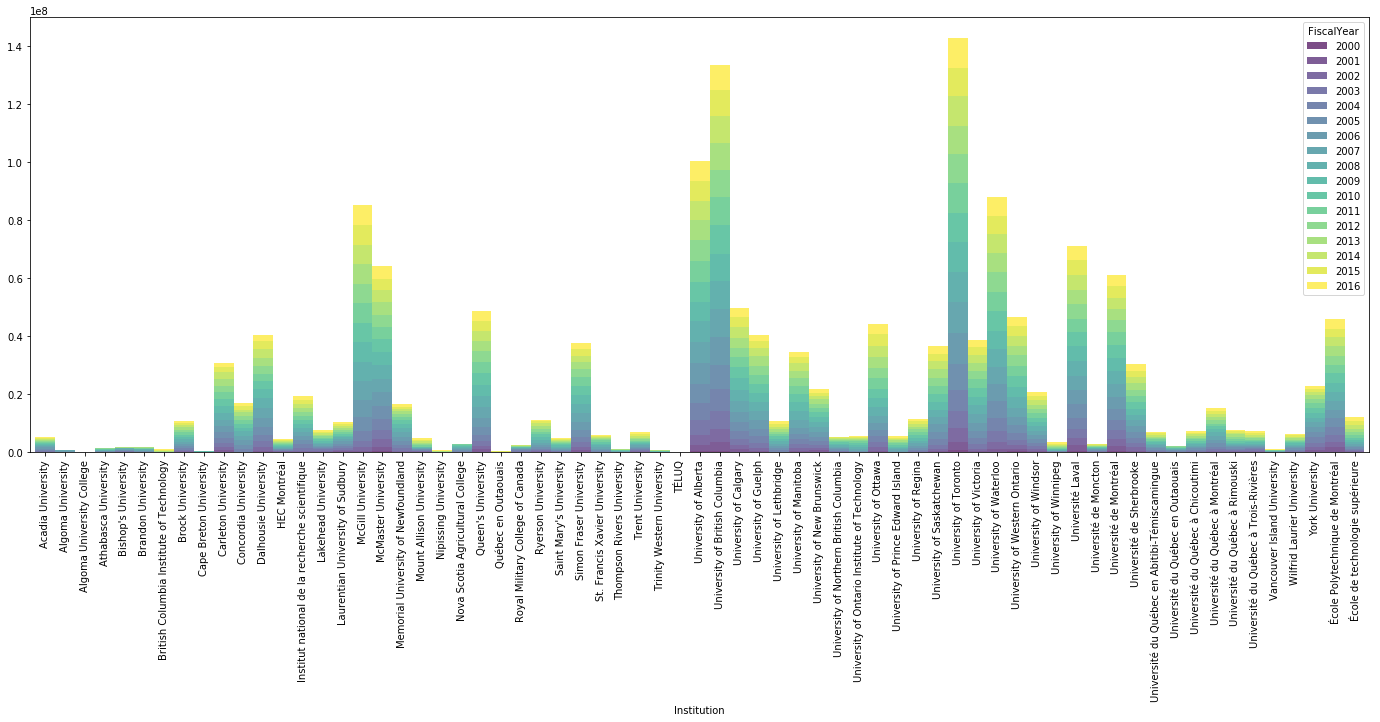

In [25]:
## CRCs by Instititution
(crc.groupby(['Institution','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=True, cmap="viridis", alpha=0.7, figsize=(24, 8), width=1)

## CRD

In [57]:
crd = df.loc[df['ProgramNameEN'] == 'Collaborative Research and Development Grants']

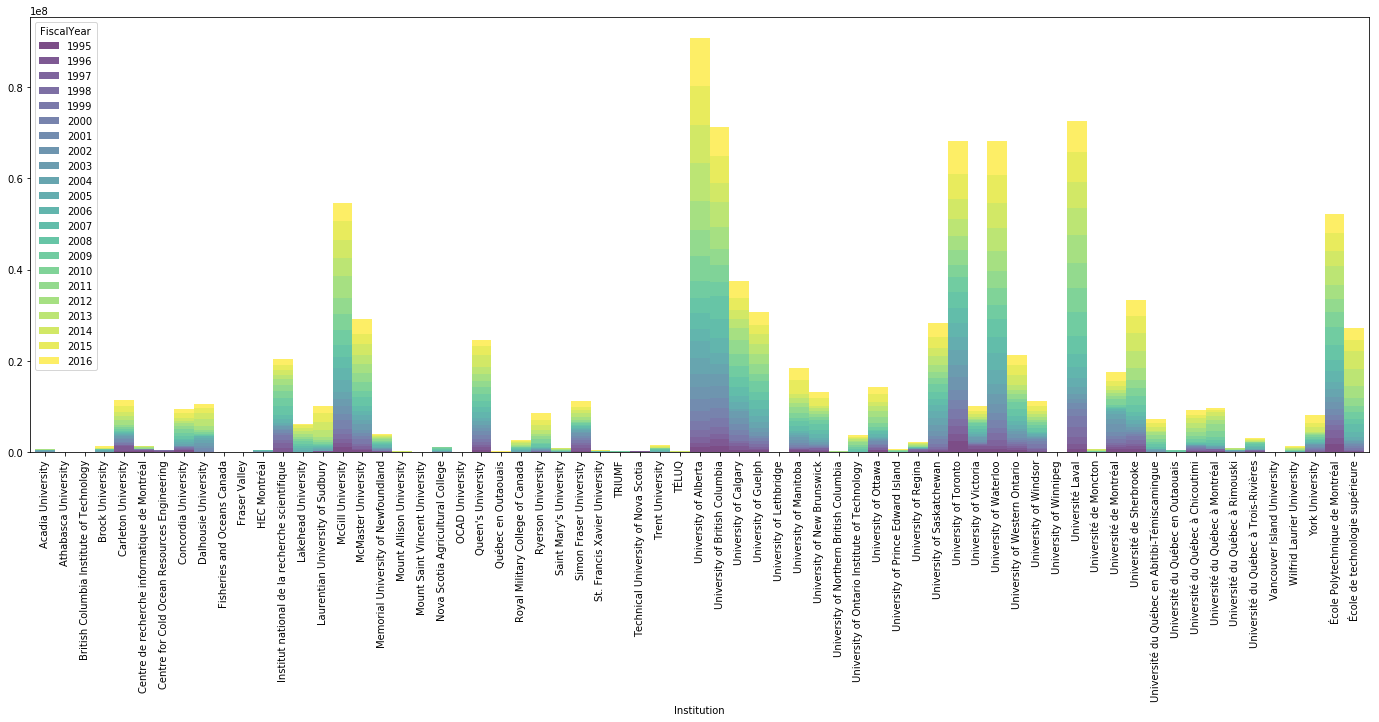

In [64]:
## Number of Awards vs Fiscal Year separated by Evaluation Group Committee
(crd.groupby(['Institution','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=True, cmap="viridis", alpha=0.7, figsize=(24, 8), width=1)

## Strategic Projects

In [60]:
strat = df.loc[df['ProgramNameEN'] == 'Strategic Projects - Group']

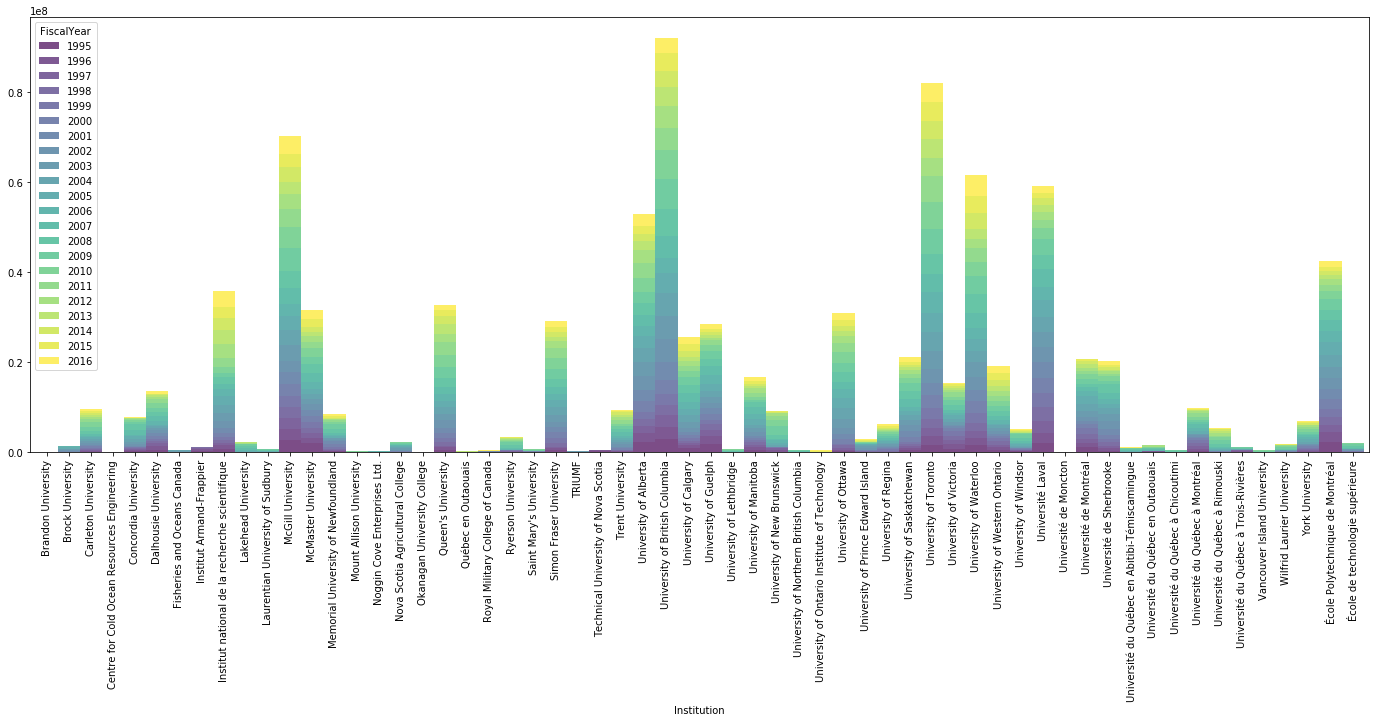

In [63]:
## Strategic Project Awards vs Fiscal Year separated by Institution
(strat.groupby(['Institution','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=True, cmap="viridis", alpha=0.7, figsize=(24, 8), width=1)

## Discovery Grants - Individual

In [26]:
discov = df.loc[df['ProgramNameEN'] == 'Discovery Grants Program - Individual']

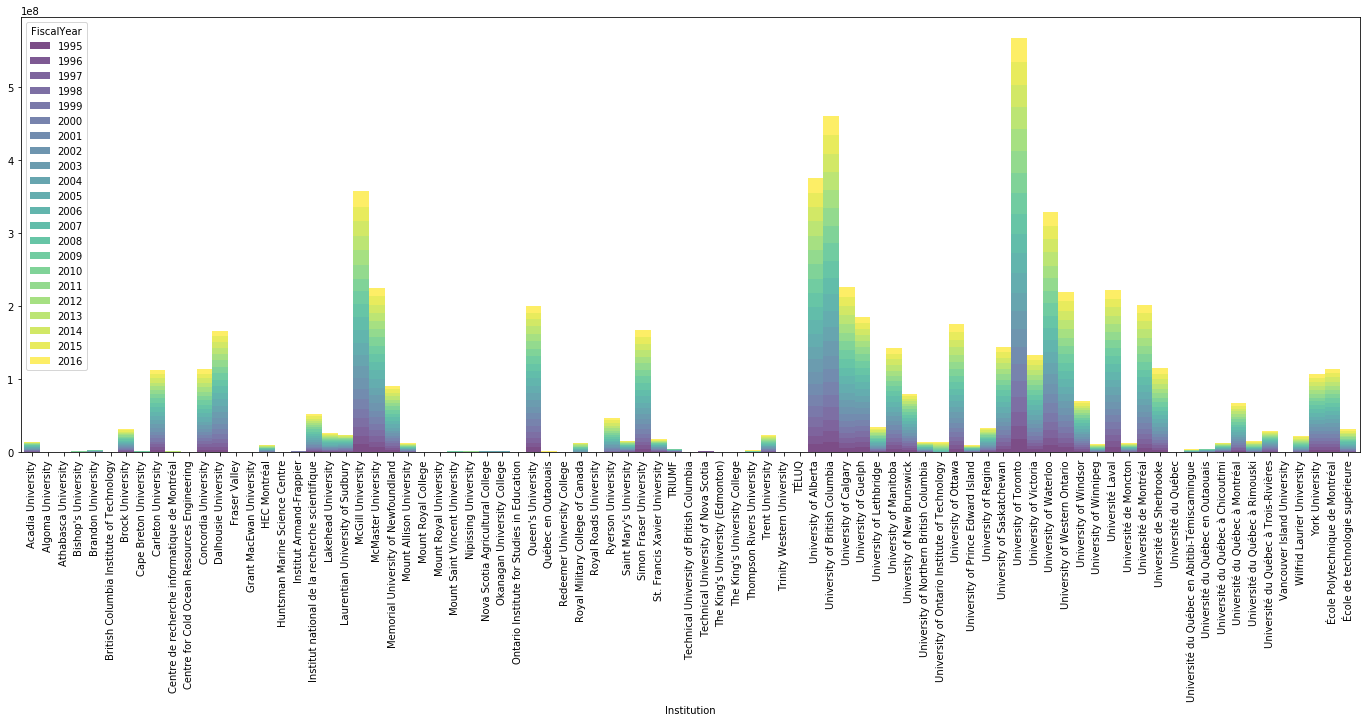

In [27]:
## Strategic Project Awards vs Fiscal Year separated by Institution
(discov.groupby(['Institution','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=True, cmap="viridis", alpha=0.7, figsize=(24, 8), width=1)